# TME2 - SPLEX
**Podlejski - Perrin**

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

path = "../TME1/"


## Preliminaries



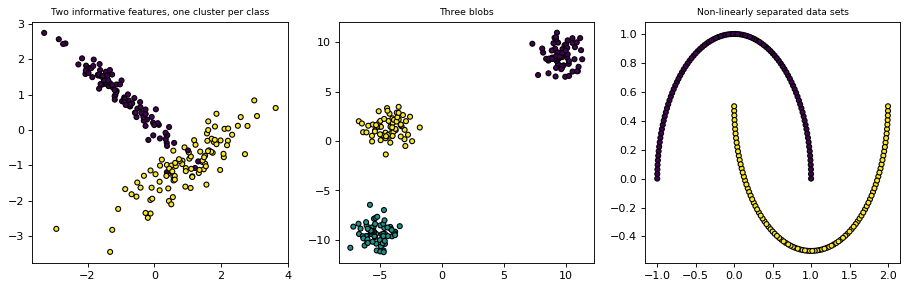

In [14]:
# First simulated data set
plt.figure(figsize=(14,4), dpi=80)
plt.subplot(131)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=20, edgecolor='k')


# Second simulated data set
plt.subplot(132)
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=20, edgecolor='k')


# Third simulated data set
plt.subplot(133)
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=20, edgecolor='k')
plt.show()

## K-MEANS

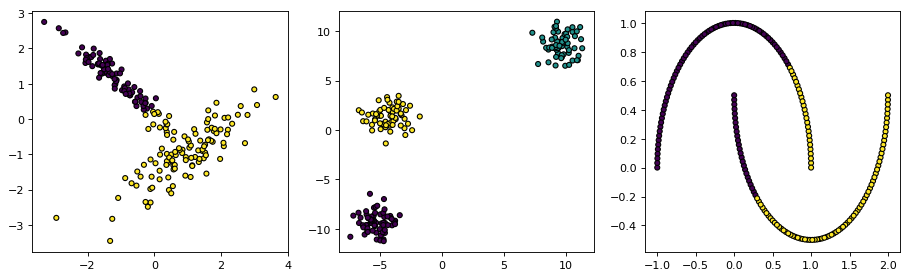

In [15]:
km2 = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
km3 = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)

plt.figure(figsize=(14,4), dpi=80)

plt.subplot(131)
km2.fit(X1)
plt.scatter(X1[:, 0], X1[:, 1], s=20, c=km2.labels_,edgecolor='k')


plt.subplot(132)
km3.fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], s=20, c=km3.labels_, edgecolor='k')

plt.subplot(133)
km2.fit(X3)
plt.scatter(X3[:, 0], X3[:, 1], s=20, c=km2.labels_, edgecolor='k')
plt.show()

## HIERARCHICAL CLUSTERING

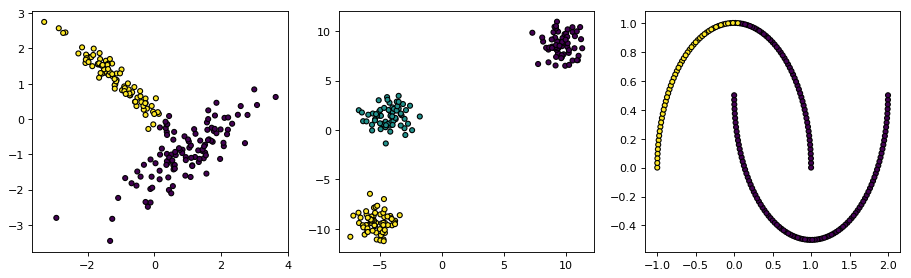

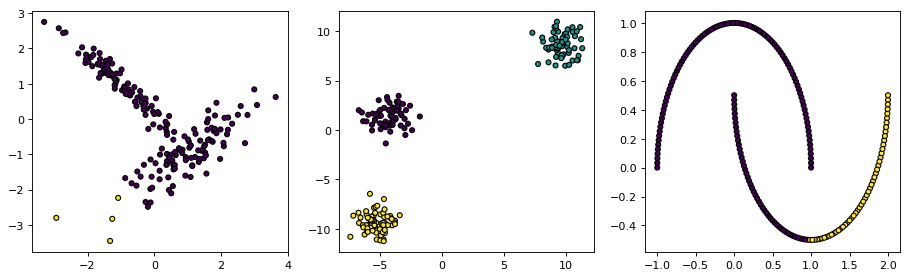

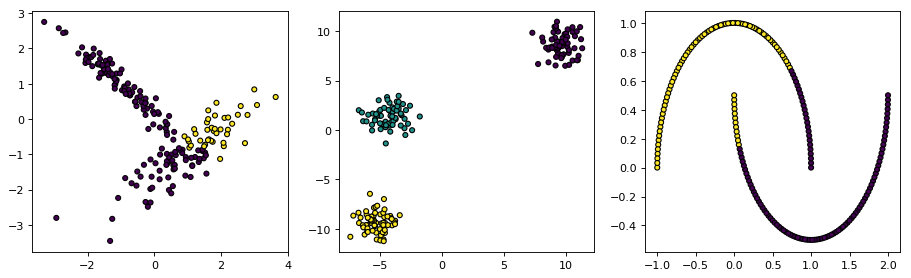

In [16]:
d = {}
for linkage in ('ward', 'average', 'complete'):
    plt.figure(figsize=(14,4), dpi=80)

    d[linkage] = {}
    d[linkage][2] = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    d[linkage][3] = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    
    plt.subplot(131)
    d[linkage][2] .fit(X1)
    plt.scatter(X1[:, 0], X1[:, 1], s=20, c= d[linkage][2].labels_, edgecolor='k')

    plt.subplot(132)
    d[linkage][3] .fit(X2)
    plt.scatter(X2[:, 0], X2[:, 1], s=20, c= d[linkage][3].labels_, edgecolor='k')
    
    plt.subplot(133)
    d[linkage][2].fit(X3)
    plt.scatter(X3[:, 0], X3[:, 1], s=20, c= d[linkage][2].labels_, edgecolor='k')
    plt.show()

## SPECTRAL CLUSTERING

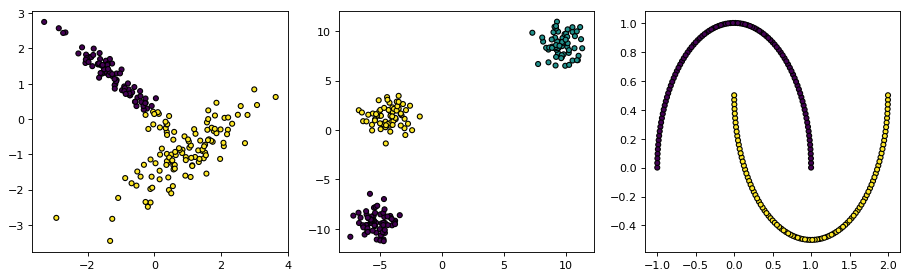

In [18]:

plt.figure(figsize=(14,4), dpi=80)

spectral2 = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',affinity="nearest_neighbors")
spectral3 = cluster.SpectralClustering(n_clusters=3, eigen_solver='arpack',affinity="nearest_neighbors")

plt.subplot(131)
spectral2.fit(X1)
plt.scatter(X1[:, 0], X1[:, 1], s=20, c=spectral2.labels_, edgecolor='k')

plt.subplot(132)
spectral3.fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], s=20, c=spectral3.labels_, edgecolor='k')

plt.subplot(133)
spectral2.fit(X3)
plt.scatter(X3[:, 0], X3[:, 1], s=20, c=spectral2.labels_, edgecolor='k')
plt.show()

## ANALYSIS OF THE RESULTS OF CLUSTERING

In [10]:
score = [[[],[],[],[],[],[]],[[],[],[],[],[],[]],[[],[],[],[],[],[]]]

for j in [[km2,'kmeans'],[d['ward'][2],"ward"],[d['average'][2],"average"],[d['complete'][2],"complete"],[spectral2,"spectral"]]:
    

    
    clust = j[0]
    clust.fit(X1)
    
    score[0][0].append(j[1])

    
    score[0][1].append(metrics.homogeneity_score(Y1,clust.labels_))
    score[0][2].append(metrics.completeness_score(Y1,clust.labels_))
    score[0][3].append(metrics.v_measure_score(Y1,clust.labels_))
    score[0][4].append(metrics.adjusted_rand_score(Y1,clust.labels_))
    score[0][5].append(metrics.silhouette_score(X1,clust.labels_))
        
    clust.fit(X3)
    
    score[2][0].append(j[1])
    score[2][1].append(metrics.homogeneity_score(Y3,clust.labels_))
    score[2][2].append(metrics.completeness_score(Y3,clust.labels_))
    score[2][3].append(metrics.v_measure_score(Y3,clust.labels_))
    score[2][4].append(metrics.adjusted_rand_score(Y3,clust.labels_))
    score[2][5].append(metrics.silhouette_score(X3,clust.labels_))



for j in [[km3,'kmeans'],[d['ward'][3],"ward"],[d['average'][3],"average"],[d['complete'][3],"complete"],[spectral3,"spectral"]]:
    clust = j[0]
    clust.fit(X2)
    
    score[1][0].append(j[1])
    score[1][1].append(metrics.homogeneity_score(Y2,clust.labels_))
    score[1][2].append(metrics.completeness_score(Y2,clust.labels_))
    score[1][3].append(metrics.v_measure_score(Y2,clust.labels_))
    score[1][4].append(metrics.adjusted_rand_score(Y2,clust.labels_))
    score[1][5].append(metrics.silhouette_score(X2,clust.labels_))
print("X1")
print
df1 = pd.DataFrame({"methode":score[0][0],
                    "homogeneity":score[0][1],
                    "completness":score[0][2],
                    "v_measure":score[0][3],
                    "adjusted_rank":score[0][4],
                    "silhouette":score[0][5]})
print(df1.to_string(index=False,columns=['methode',"homogeneity","completness","v_measure","adjusted_rank","silhouette"], justify='center'))
print
print("X2")
print
df2 = pd.DataFrame({"methode":score[1][0],
                    "homogeneity":score[1][1],
                    "completness":score[1][2],
                    "v_measure":score[1][3],
                    "adjusted_rank":score[1][4],
                    "silhouette":score[1][5]})
print(df2.to_string(index=False,columns=['methode',"homogeneity","completness","v_measure","adjusted_rank","silhouette"], justify='center'))
print
print("X3")
print
df3 = pd.DataFrame({"methode":score[2][0],
                    "homogeneity":score[2][1],
                    "completness":score[2][2],
                    "v_measure":score[2][3],
                    "adjusted_rank":score[2][4],
                    "silhouette":score[2][5]})
print(df3.to_string(index=False,columns=['methode',"homogeneity","completness","v_measure","adjusted_rank","silhouette"], justify='center'))

X1

 methode   homogeneity  completness  v_measure  adjusted_rank  silhouette
   kmeans   0.314015     0.351547    0.331723     0.321975      0.502576 
     ward   0.230890     0.303714    0.262342     0.182053      0.516877 
  average   0.230890     0.303714    0.262342     0.182053      0.516877 
 complete   0.137506     0.225463    0.170828     0.081702      0.501014 
 spectral   0.316057     0.372441    0.341941     0.288735      0.512345 

X2

 methode   homogeneity  completness  v_measure  adjusted_rank  silhouette
   kmeans      1.0          1.0         1.0          1.0        0.779078 
     ward      1.0          1.0         1.0          1.0        0.779078 
  average      1.0          1.0         1.0          1.0        0.779078 
 complete      1.0          1.0         1.0          1.0        0.779078 
 spectral      1.0          1.0         1.0          1.0        0.779078 

X3

 methode   homogeneity  completness  v_measure  adjusted_rank  silhouette
   kmeans   0.188722    

**Optimality :**

    For X1 -> average
    
    For X2 -> kmeans or ward
    
    For X3 -> spectral

## APPLY CLASSIFICATION ON CANCER DATA

In [25]:
breast_data = pd.read_table(path + "BreastDiagnostic.txt", sep =",")
classes_breast = [1 if label == "B" else 0 for label in breast_data.values[:,1]]
obs_breast = breast_data.values[:,2:]

mice_data = pd.ExcelFile(path + "Data_Cortex_Nuclear.xls")
mice_data = mice_data.parse()
mice_data.fillna(mice_data.median(), inplace=True)
obs_mice = mice_data.values[:,1:-4]
classes_mice = [1 if label == "c-CS-m" else 0 for label in mice_data.values[:,-1]]

/home/witold/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [29]:
score_data = [[[],[],[],[],[],[]],[[],[],[],[],[],[]]]

for j in [[km2,'kmeans'],[d['ward'][2],"ward"],[d['average'][2],"average"],[d['complete'][2],"complete"],[spectral2,"spectral"]]:
    
    clust = j[0]
    clust.fit(obs_breast)
    
    score_data[0][0].append(j[1])

    
    score_data[0][1].append(metrics.homogeneity_score(classes_breast,clust.labels_))
    score_data[0][2].append(metrics.completeness_score(classes_breast,clust.labels_))
    score_data[0][3].append(metrics.v_measure_score(classes_breast,clust.labels_))
    score_data[0][4].append(metrics.adjusted_rand_score(classes_breast,clust.labels_))
    score_data[0][5].append(metrics.silhouette_score(obs_breast,clust.labels_))
        
    clust.fit(obs_mice)
    
    score_data[1][0].append(j[1])
    score_data[1][1].append(metrics.homogeneity_score(classes_mice,clust.labels_))
    score_data[1][2].append(metrics.completeness_score(classes_mice,clust.labels_))
    score_data[1][3].append(metrics.v_measure_score(classes_mice,clust.labels_))
    score_data[1][4].append(metrics.adjusted_rand_score(classes_mice,clust.labels_))
    score_data[1][5].append(metrics.silhouette_score(obs_mice,clust.labels_))

In [30]:
print("Breast")
print
df1 = pd.DataFrame({"methode":score_data[0][0],
                    "homogeneity":score_data[0][1],
                    "completness":score_data[0][2],
                    "v_measure":score_data[0][3],
                    "adjusted_rank":score_data[0][4],
                    "silhouette":score_data[0][5]})
print(df1.to_string(index=False,columns=['methode',"homogeneity","completness","v_measure","adjusted_rank","silhouette"], justify='center'))
print
print("Mice")
print
df2 = pd.DataFrame({"methode":score_data[1][0],
                    "homogeneity":score_data[1][1],
                    "completness":score_data[1][2],
                    "v_measure":score_data[1][3],
                    "adjusted_rank":score_data[1][4],
                    "silhouette":score_data[1][5]})
print(df2.to_string(index=False,columns=['methode',"homogeneity","completness","v_measure","adjusted_rank","silhouette"], justify='center'))


Breast

 methode   homogeneity  completness  v_measure  adjusted_rank  silhouette
   kmeans   0.420787     0.516087    0.463590     0.490413      0.697265 
     ward   0.260203     0.406698    0.317361     0.285743      0.690217 
  average   0.062994     0.245177    0.100234     0.061661      0.683972 
 complete   0.054514     0.235970    0.088568     0.052952      0.692951 
 spectral   0.426533     0.406793    0.416429     0.418696      0.406852 

Mice

 methode   homogeneity  completness  v_measure  adjusted_rank  silhouette
   kmeans   0.001023     0.000595    0.000753     0.000855      0.246069 
     ward   0.047840     0.029497    0.036493    -0.036351      0.200155 
  average   0.000344     0.018738    0.000675    -0.001547      0.541219 
 complete   0.016957     0.023639    0.019748     0.096591      0.285037 
 spectral   0.001367     0.000834    0.001035     0.008556      0.127237 
